# Analytical

In [345]:
import pandas as pd
df = pd.read_excel('/content/ds.xlsx')
df[df['country_id']=='BDV'].groupby('site_id').count().ts

# ----------
# Answer:
# 5NPAU
# 717

site_id
3POLC      5
5NPAU    717
N0OTG    122
Name: ts, dtype: int64

In [346]:
df = pd.read_excel('/content/ds.xlsx')
df['ts'] = pd.to_datetime(df['ts'])

start_datetime = pd.to_datetime('2019-02-03 00:00:00')
end_datetime = pd.to_datetime('2019-02-04 23:59:59')

df_within_datetime = df[(df['ts']>start_datetime) & (df['ts']<end_datetime)]
df_suspicious = df_within_datetime.groupby(['user_id', 'site_id']).count()
df_suspicious[df_suspicious['ts'] > 10].sort_values('ts', ascending=False)['ts']

# ----------
# Answer:
# (LC3A59, N0OTG, 26)
# (LC06C3, N0OTG, 25)
# (LC3C9D, N0OTG, 17)
# (LC3C7E, 3POLC, 15)

user_id  site_id
LC3A59   N0OTG      26
LC06C3   N0OTG      25
LC3C9D   N0OTG      17
LC3C7E   3POLC      15
Name: ts, dtype: int64

In [347]:
df = pd.read_excel('/content/ds.xlsx')
df['ts'] = pd.to_datetime(df['ts'])
# Get all users' last visit then group them by site_id, finally get the three largest counts 
df.sort_values(['user_id', 'ts']).groupby('user_id').tail(1).groupby('site_id').count().nlargest(3,'ts')['ts'] 

# ----------
# Answer:
# (5NPAU, 992)
# (N0OTG, 561)
# (QGO3G, 289)

site_id
5NPAU    992
N0OTG    561
QGO3G    289
Name: ts, dtype: int64

In [348]:
df = pd.read_excel('/content/ds.xlsx')
# Combine users' first and last visit. 
groups_by_user = df.sort_values(['user_id', 'ts']).groupby('user_id')
df_first_last = pd.concat([groups_by_user.head(1), groups_by_user.tail(1)])
# Some users only visited one site and they are treated same as the users whose first and last vists are the same.
df_num_of_site_visited = df_first_last.groupby(['user_id']).nunique()[['site_id']]
df_num_of_site_visited[df_num_of_site_visited['site_id']==1].count()

# ----------
# Answer:
# 1670

site_id    1670
dtype: int64

# Regression

The coefficients are estimated based on Ordinary Least Squares (OLS) approach. Please see below for the equations implemented.

![alt text](https://i.ibb.co/dBZW093/Screenshot-2020-05-11-at-13-11-15.png)

Data preparation and OLS implementation

In [0]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import numpy as np
import pandas as pd

df = pd.read_excel('/content/ds.xlsx', sheet_name=1, header=None, names=['a', 'b', 'c'])
X = df.iloc[:,0:2].to_numpy()
y = df.iloc[:,2:3].to_numpy()
A = df.a.to_list()
B = df.b.to_list()
C = df.c.to_list()

def estimate_coefficients(X, y):
  return np.linalg.inv(X.transpose().dot(X)).dot(X.transpose()).dot(y)

C has significantly high variance. It is better to investigate into the data and identify the outliers.

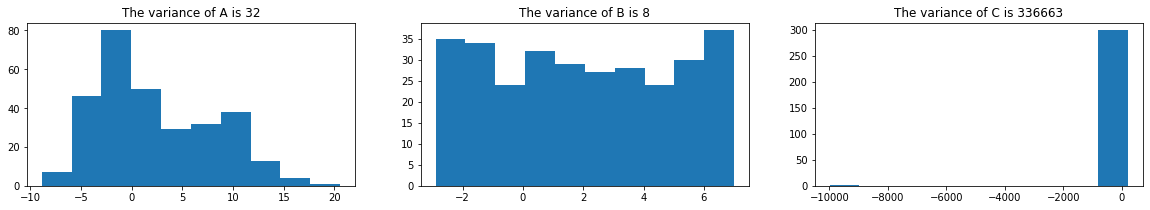

In [398]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20,3))
ax[0].hist(A)
ax[0].set_title("The variance of A is " + str(int(np.var(A))))
ax[1].hist(B)
ax[1].set_title("The variance of B is " + str(int(np.var(B))))
ax[2].hist(C)
ax[2].set_title("The variance of C is " + str(int(np.var(C))));

In [401]:
df = pd.read_excel('/content/ds.xlsx', sheet_name=1, header=None, names=['a', 'b', 'c'])
df.sort_values('c').head()

,a,b,c
200,10.073362,-2.241367,-9999.000000
298,11.438586,6.293760,-315.397489
229,11.038793,6.208724,-289.174093
259,11.323902,5.905273,-287.963053
275,10.386310,6.865152,-286.055387


It is obvious that row 200 is an anomaly. Therefore, it is removed before multivariate regression modelling. Redo data preparation and visualise data points and a plane of the regression function.

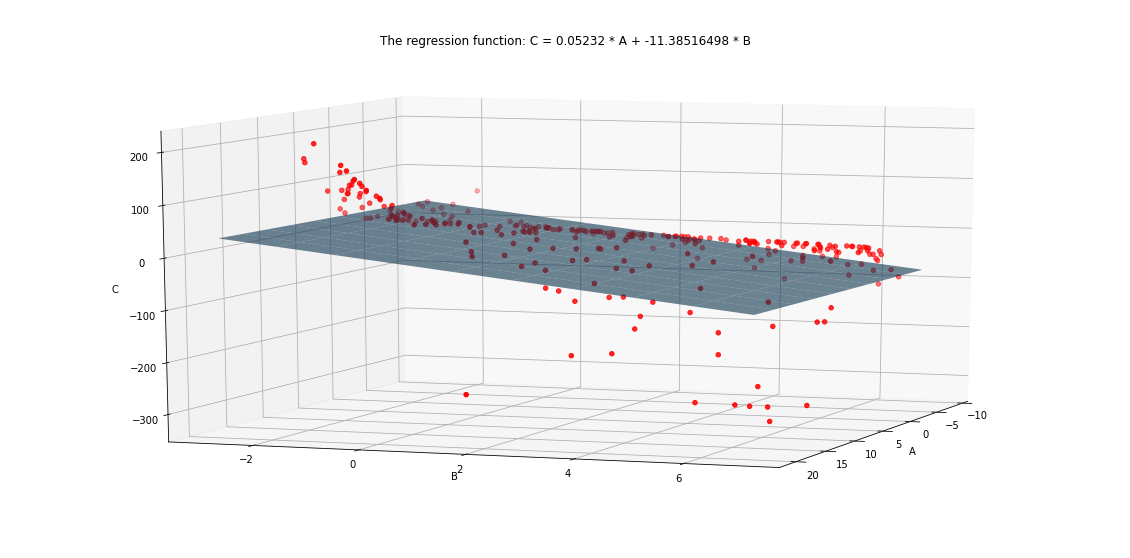

In [402]:
df.drop(index=200, inplace=True)
X = df.iloc[:,0:2].to_numpy()
y = df.iloc[:,2:3].to_numpy()
A = df.a.to_list()
B = df.b.to_list()
C = df.c.to_list()
coefficients = estimate_coefficients(X, y)

range_A = np.linspace(np.min(A), np.max(A), 10)
range_B = np.linspace(np.min(B), np.max(B), 10)
meshgrid_A, meshgrid_B = np.meshgrid(range_A, range_B)
meshgrid_C = coefficients[0]*meshgrid_A + coefficients[1]*meshgrid_B

fig = plt.figure(figsize=(20,10))
ax = fig.gca(projection='3d')
ax.view_init(azim=20, elev=10)
ax.plot_surface(meshgrid_A, meshgrid_B, meshgrid_C, alpha=0.6)
ax.scatter(A, B, C, c='r')
ax.set_xlabel("A")
ax.set_ylabel("B")
ax.set_zlabel("C")
plt.title("The regression function: C = 0.05232 * A + -11.38516498 * B");